In [1]:
# Import dependencies
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [2]:
# Read myopia.csv into a Pandas DataFrame
myopia_df = pd.read_csv("myopia.csv")
myopia_df

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
613,6,0.678,22.400000,3.663,3.803,14.93,2,0,7,3,14,37,1,0,1
614,6,0.665,22.500000,3.570,3.378,15.56,6,0,1,0,8,10,1,1,0
615,6,1.834,22.940001,3.624,3.424,15.89,8,0,0,0,4,4,1,1,0
616,6,0.665,21.920000,3.688,3.598,14.64,12,2,1,0,15,23,0,0,0


In [3]:
# Remove the "MYOPIC" column from the dataset
myopic_column = myopia_df['MYOPIC']
myopia_df.drop(columns='MYOPIC', inplace=True)
myopia_df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [4]:
# Create an instance of StandardScaler
scaler = StandardScaler()

# Standardize the dataset
myopia_scaled = scaler.fit_transform(myopia_df)


Part 2: Apply Dimensionality Reduction

In [5]:
# Create an instance of PCA with 90% explained variance
pca = PCA(n_components=0.9)

# Fit the PCA model to the standardized data
myopia_pca = pca.fit_transform(myopia_scaled)

# Print the shape of the original and reduced datasets
print("Original Dataset Shape: ", myopia_scaled.shape)
print("Reduced Dataset Shape: ", myopia_pca.shape)


Original Dataset Shape:  (618, 14)
Reduced Dataset Shape:  (618, 10)


c:\Users\Tom B\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
c:\Users\Tom B\anaconda3\envs\PythonData\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


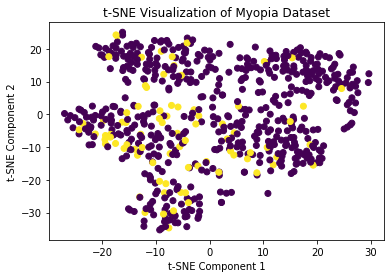

In [6]:
# Create an instance of t-SNE with two components
tsne = TSNE(n_components=2)

# Fit the t-SNE model to the PCA-transformed data
myopia_tsne = tsne.fit_transform(myopia_pca)

# Create a scatter plot of the t-SNE output
plt.scatter(myopia_tsne[:,0], myopia_tsne[:,1], c=myopic_column)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization of Myopia Dataset")
plt.show()


Part 3: Perform a Cluster Analysis with K-means

c:\Users\Tom B\anaconda3\envs\PythonData\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  "KMeans is known to have a memory leak on Windows "


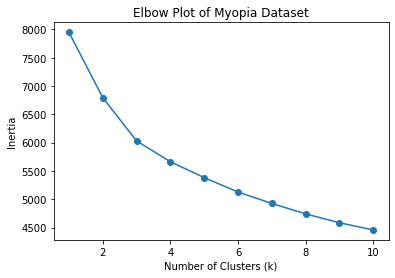

In [7]:
# Initialize a list to store the inertia values for each k
inertias = []

# Loop through values of k from 1 to 10 and fit a k-means model to the data
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(myopia_pca)
    
    # Append the inertia value to the list
    inertias.append(kmeans.inertia_)

# Plot the elbow plot
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Plot of Myopia Dataset")
plt.show()
